In [1]:
# library
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import resample
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# load cleaned data
data = pd.read_pickle("cleaned.pkl")

In [3]:
data

,company_profile,description,requirements,benefits,fraudulent
0,food52 weve created groundbreaking awardwinnin...,food52 fastgrowing james beard awardwinning on...,experience content management systems major pl...,experience content management systems major pl...,0
1,90 seconds worlds cloud video production servi...,organised focused vibrant awesomedo passion cu...,expect key responsibility communicate client 9...,expect key responsibility communicate client 9...,0
2,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,implement precommissioning commissioning proce...,0
3,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelors masters gis business admin...,education bachelors masters gis business admin...,0
4,spot source solutions llc global human capital...,job title itemization review manager location ...,qualifications rn license state texas diploma ...,qualifications rn license state texas diploma ...,0
...,...,...,...,...,...
17875,vend looking awesome new talent come join us y...,case first time youve visited website vend awa...,ace role eat comprehensive statements work bre...,ace role eat comprehensive statements work bre...,0
17876,web linc ecommerce platform services provider ...,payroll accountant focus primarily payroll fun...,ba bs accounting desire fun love genuine passi...,ba bs accounting desire fun love genuine passi...,0
17877,provide full time permanent positions many med...,experienced project cost control staff enginee...,least 12 years professional experienceability ...,least 12 years professional experienceability ...,0
17878,na,nemsia studios looking experienced visualgraph...,1 must fluent latest versions corel amp adobe ...,1 must fluent latest versions corel amp adobe ...,0


In [4]:
# We connect all text together as one feature.
data["full_text"] = data["company_profile"] + " " + data["description"] + " " + data["requirements"] + " " + data["benefits"]

In [5]:
# Check if there has any Null value
null_all = data.isnull().sum()
print(null_all)

company_profile    0
description        0
requirements       0
benefits           0
fraudulent         0
full_text          0
dtype: int64


# Balance Data Set

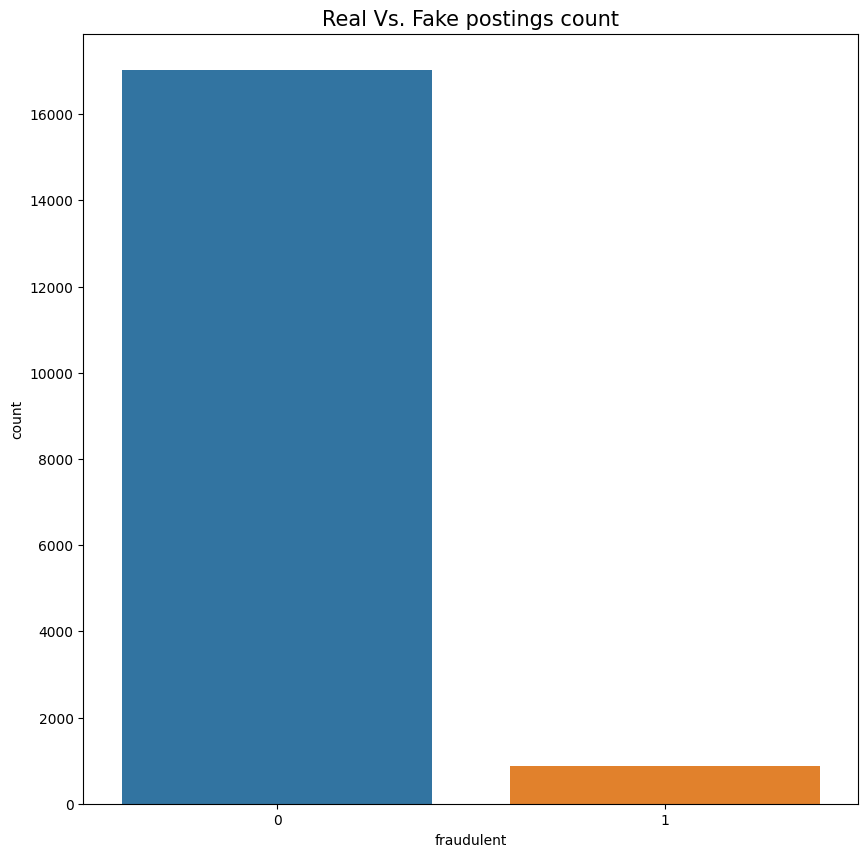

In [6]:
# Check if imbalance data by using bar figure.
plt.figure(figsize = (10,10))
sns.countplot(x="fraudulent", data=data)
plt.title("Real Vs. Fake postings count", fontsize = 15)
plt.show()

In [7]:
train, test = train_test_split(data, test_size=0.2, random_state = 1)

In [8]:
# Check imbalance data distribution.
print("Number of cases: " , len(train))
print("Number of fraudulent cases: ", len(train[train["fraudulent"] == 1]))
print("Number of non fraudulent cases: ", len(train[train["fraudulent"] == 0]))

Number of cases:  14303
Number of fraudulent cases:  708
Number of non fraudulent cases:  13595


In [9]:
# Random seed.
random.seed(1)

# Since the fraudulent cases is extremely less than non-fradulent cases, we assign non-fraudulent as majority.
df_majority = train[train["fraudulent"]== 0]
df_minority = train[train["fraudulent"]== 1]

# Upsample the dataset by simply copying records from minority classes by using resample().
# The value for the n_samples parameter is set to a half of the number of majority class to avoid overfitting.
negative_upsample = resample(df_minority, replace = True, 
                        n_samples = math.ceil(df_majority.shape[0]/2),
                        random_state = 101)

# Aslo, we need to undersample majority classes
negative_undersample = resample(df_majority, replace = True, 
                        n_samples = math.ceil(df_majority.shape[0]/2),
                        random_state = 101)

# Concat two dataframes (majority class and upsampled minority class).
df_upsampled = pd.concat([negative_undersample, negative_upsample])
df_upsampled = df_upsampled.sample(frac = 1, random_state = 101)

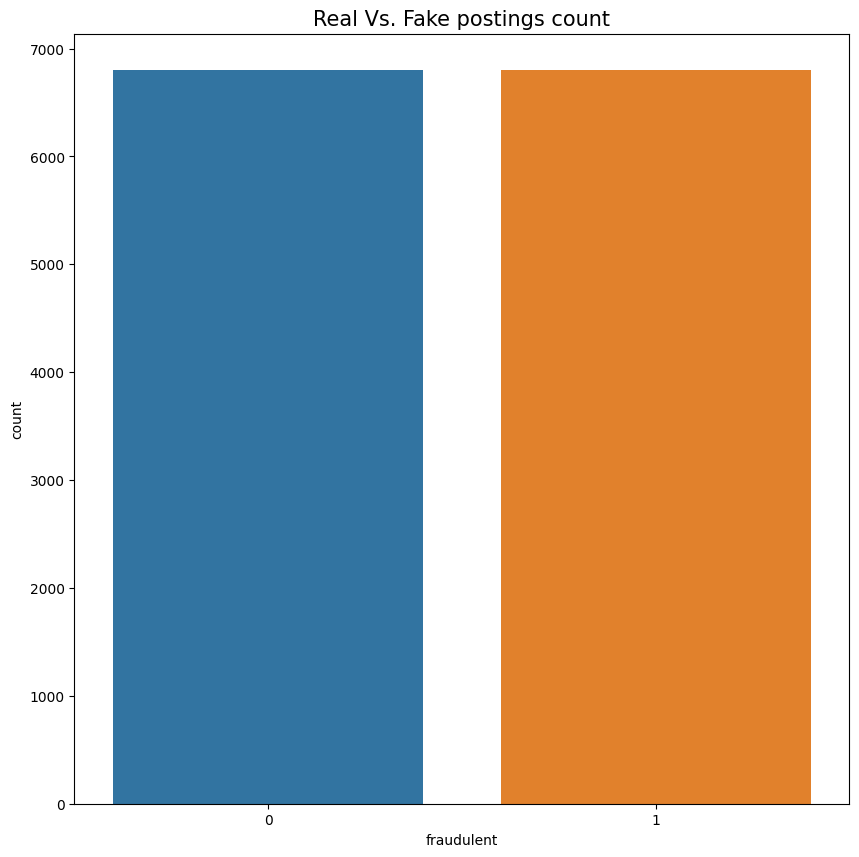

In [10]:
# Show data distribution after resample
plt.figure(figsize = (10,10))
sns.countplot(x="fraudulent", data=df_upsampled)
plt.title("Real Vs. Fake postings count", fontsize = 15)
plt.show()

In [11]:
# Check data after resample.
print("Number of cases: " , len(df_upsampled))
print("Number of fraudulent cases: ", len(df_upsampled[df_upsampled["fraudulent"] == 1]))
print("Number of non fraudulent cases: ", len(df_upsampled[df_upsampled["fraudulent"] == 0]))

Number of cases:  13596
Number of fraudulent cases:  6798
Number of non fraudulent cases:  6798


In [12]:
# Set train data as "full_text" feature and set target value.
train_x = df_upsampled['full_text']
test_x = test['full_text']

train_y = df_upsampled['fraudulent']
test_y = test['fraudulent']

In [13]:
# In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.
# Our model cannot simply read the text data so we convert it into numerical format. 
# In order to convert the data into numerical format we create vectors from text.
vectorizer = TfidfVectorizer()

train_data = vectorizer.fit_transform(train_x)
test_data = vectorizer.transform(test_x)

### KNN implementation

For applying KNN, first import the KNeighborsClassifier module and create KNN classifier object by giving a number of neighbors in KNeighborsClassifier() function. 


In [ ]:
# import needed libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Implement KNN on unprocessed dataset
First, check the performance of KNN by using the oringinal uncleaned and unbalanced data, pick the 'description' as the feature.

In [14]:
#define the variables
x = data['description']
y = data['fraudulent']

#split it into training and test sets
x_train_unprocessed, x_test_unprocessed, y_train_unprocessed, y_test_unprocessed = train_test_split(x, y, test_size=0.2, random_state = 1)

#vectorization
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train_unprocessed)

x_trainvec = vectorizer.transform(x_train_unprocessed)
x_testvec = vectorizer.transform(x_test_unprocessed)

knn = KNeighborsClassifier()
knn.fit(x_trainvec, y_train_unprocessed)
y_pred_unprocessed = knn.predict(x_testvec).flatten()
accuracy_score(y_pred_unprocessed, y_test_unprocessed)

NameError: name 'accuracy_score' is not defined

#### Implement KNN on processed dataset

In our implementation, we use K=1, K=3, and K=5 and compare their accuracy, confusion matrix, and finally check the difference between their classification reports.

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(train_data, train_y)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(train_data, train_y)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(train_data, train_y)

In [ ]:
y_test = test_y.values.flatten()

y_pred1 = knn1.predict(test_data).flatten()
y_pred3 = knn3.predict(test_data).flatten()
y_pred5 = knn5.predict(test_data).flatten()

In [ ]:
# report
knn_accuracy1 = accuracy_score(y_pred1, y_test)
knn_confusionMatrix1 = confusion_matrix(y_test, y_pred1)
knn_classification1 = classification_report(y_test, y_pred1)

knn_accuracy3 = accuracy_score(y_pred3, y_test)
knn_confusionMatrix3 = confusion_matrix(y_test, y_pred3)
knn_classification3 = classification_report(y_test, y_pred3)

knn_accuracy5 = accuracy_score(y_pred5, y_test)
knn_confusionMatrix5 = confusion_matrix(y_test, y_pred5)
knn_classification5 = classification_report(y_test, y_pred5)

# print report
print("- Accuracy score of KNN")
print(f"K=1: {knn_accuracy1}")
print(f"K=3: {knn_accuracy3}")
print(f"K=5: {knn_accuracy5}\n\n")

print("- Confusion matrix of KNN")
print(f"K=1:\n {knn_confusionMatrix1}\n")
print(f"K=3:\n {knn_confusionMatrix3}\n")
print(f"K=5:\n {knn_confusionMatrix5}\n\n")


print("- Classification report of KNN")
print(f"\nK=1:\n {knn_classification1}\n")
print(f"\nK=3:\n {knn_classification3}\n")
print(f"\nK=5:\n {knn_classification5}")

### AUC-ROC

The results showing that we got better scores with the smaller K value. We use K=5 for the AUC-ROC graph generation, because a large number of neighbors will have a smoother decision boundary and K=5 also has accuracy greater than 90%.


In [ ]:
# for K=5
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred5.ravel())
auc = metrics.roc_auc_score(y_test, y_pred5, average='macro')
roc_auc = metrics.auc(fpr, tpr)
print ('AUC:\t', auc)
print ('ROC:\t', roc_auc)

In [ ]:
# plot the ROC curve and AUC

plt.figure(figsize=(7, 5), dpi=80, facecolor='w')
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))  
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(fpr, tpr, 'r-', lw=2, label='AUC (area = {0:.4f})' % auc)
plt.legend(loc='lower right')
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.grid(visible=True, ls=':')
plt.title(u'ROC curve And  AUC', fontsize=18)
plt.show()